# Статистическая проверка гипотез для связанных выборок. A/B тесты и как их проводить

**Замечание: 1** Предполагается, что для решения заданий  № 1-3 будут использоваться разные тесты.

**Замечание: 2** Для зачета уже достаточно половины абсолютно верно решенных заданий. 

Если возникают сложности по ходу решения - пиште свой вопрос в общий чат в Slack. Там всегда подскажут)

In [1]:
 # Подгрузим пакеты 
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt  #Пакет для построения графиков и прочего
import seaborn as sns
import scipy.stats as stats

## Задание № 1 
Вам даны результаты проверки двух препаратов. Требуется: 
* Оценить, есть ли различие в эффекте у этих пациентов? 
* Визуально подтвердить результат A - результаты для группы людей получающих препарат А. B - результаты для другой группы людей, получающих препарат B.

In [2]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

In [3]:
# Проведем U-тест Манна-Уитни
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(A, B) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p))
# Интерпретируем
alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=4343.000, p=0.054
Одинаковые распределения (не отвергаем H0)


11.345546240764518 22.557496178167234


(array([ 5.,  7., 13., 13., 21., 16., 11.,  8.,  3.,  3.]),
 array([-99.92486747, -73.18817253, -46.45147758, -19.71478263,
          7.02191231,  33.75860726,  60.4953022 ,  87.23199715,
        113.9686921 , 140.70538704, 167.44208199]),
 <a list of 10 Patch objects>)

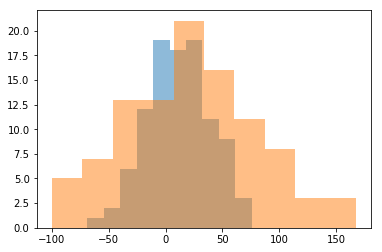

In [4]:
print(np.mean(A), np.mean(B))
plt.hist(A, alpha = 0.5)
plt.hist(B, alpha = 0.5)

Различия в эффекте у пациентов отсутствуют.

## Задание № 2 
Вам даны результаты проверки двух препаратов. Требуется: 
* Оценить, есть ли различие в эффекте у этих пациентов? 
* Визуально подтвердить результат А - группа людей без препарата. B - та же группа людей, но получающая препарат

In [5]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

In [6]:
# Проверим по критерию Уилкоксона
from scipy.stats import wilcoxon
stat, p = wilcoxon(A, B)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=1930.000, p=0.041
Разные распределения (отвергаем H0)


(array([ 5.,  7., 13., 13., 21., 16., 11.,  8.,  3.,  3.]),
 array([-99.92486747, -73.18817253, -46.45147758, -19.71478263,
          7.02191231,  33.75860726,  60.4953022 ,  87.23199715,
        113.9686921 , 140.70538704, 167.44208199]),
 <a list of 10 Patch objects>)

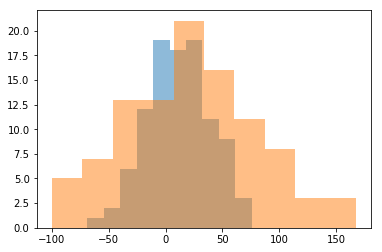

In [7]:
plt.hist(A, alpha = 0.5)
plt.hist(B, alpha = 0.5)

##  Задание № 3 
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
* Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
* Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью boxplot или hist 

water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1] 

nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5] 

mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

In [8]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

In [9]:
# Проведем дисперсионный анализ
from scipy.stats import f_oneway
F, p = f_oneway(water, nutri, mineral)
alpha = 0.05  # Уровень значимости
# Выведем результаты дисперсионного анализа
print(F, p)

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

12.525963044834192 2.9240047906326866e-05
Разное распределение (отклоняем H0)


(array([4., 0., 5., 0., 0., 5., 0., 5., 0., 2.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

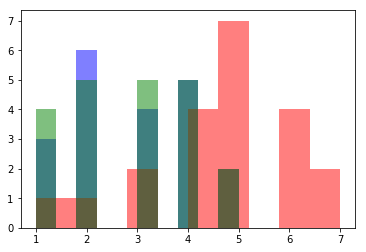

In [10]:
plt.hist(water, alpha = 0.5, color='b')
plt.hist(nutri, alpha = 0.5, color='r')
plt.hist(mineral, alpha = 0.5, color='g')

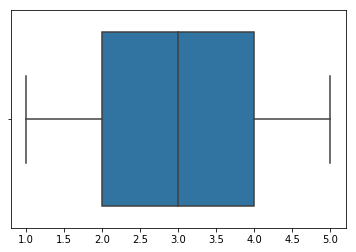

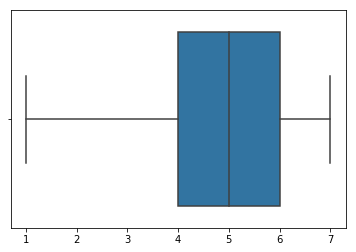

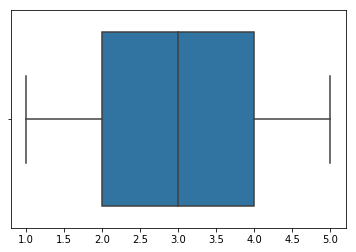

In [11]:
sns.boxplot(water)
plt.show()
sns.boxplot(nutri)
plt.show()
sns.boxplot(mineral)
plt.show()

Таким образом, эффект от удобрения есть.

## Cookie Cats

Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. Посмотрите эту короткую демонстрацию:

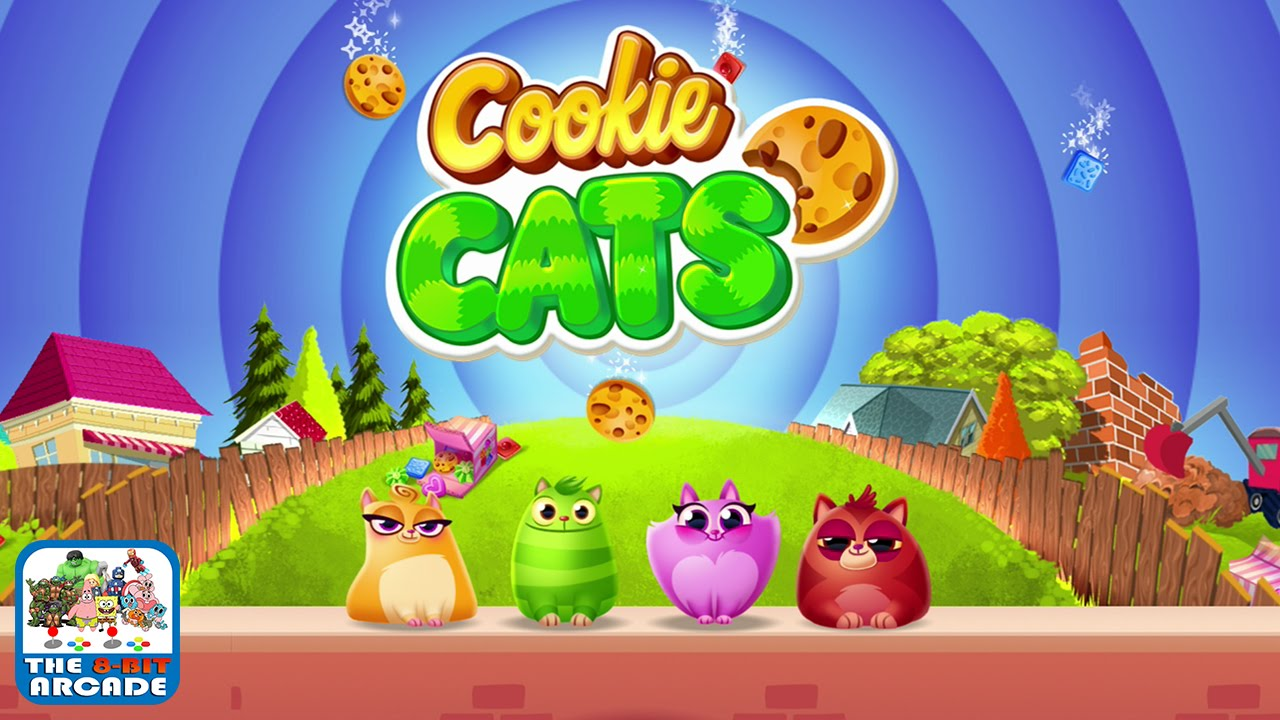

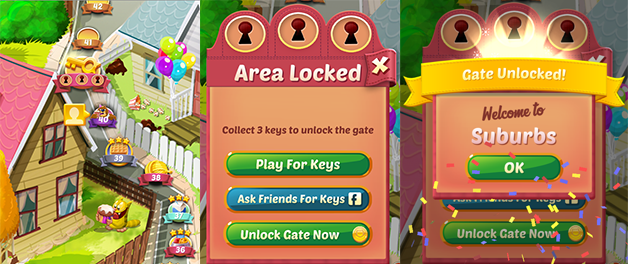

По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.

Но где ставить ворота? Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.

### Данные A/B тестирования

In [12]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - проигрыватель вернулся и поиграл через 1 день после установки?
* `retention_7` - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

## Задание: 
провести анализ данных и сделать выводы о лучшем месте для установки ворот. Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиции для подтверждения ваших выводом. Рекомендую использовать seaborn c его sns.boxplot/sns.carplot, sns.barplot, но можно обойтись и обычном matplotlib

In [13]:
# Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


Из полученных результатов видим, что данные сбалансированы.

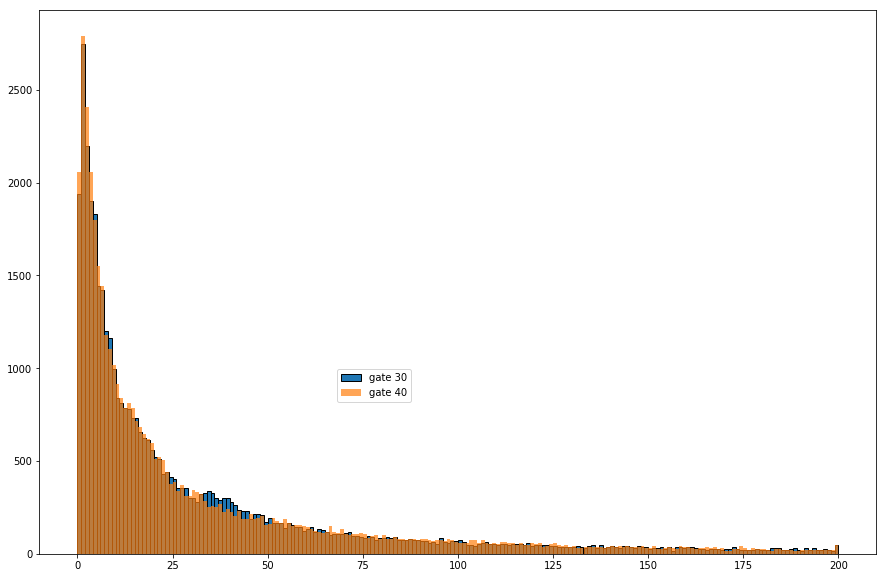

In [14]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

Из полученных данных видим, что данные распределены между двумя группами приблизительно одинаково.

<Figure size 1080x720 with 0 Axes>

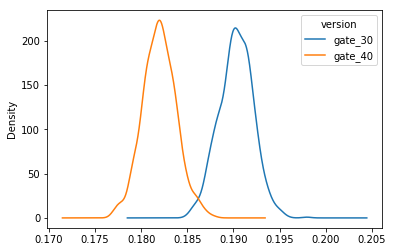

In [15]:
#Если вдруг оказалось сложно, то вот еще ододин способ визуализации различий
# Creating an list with bootstrapped means for each AB-group
plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

### Используя любой тест для проверки статистической гипотезы, продемонстрируйте наличие эффекта из-за сдвига ворот.

In [16]:
# Проведем U-тест Манна-Уитни по колонке значений тех, кто вернулся и играл через 7 дней после установки
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(boot_1d.gate_30, boot_1d.gate_40)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# Интерпретируем
alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=788.000, p=0.000
Разные распределения (отвергаем H0)


In [17]:
# Проведем U-тест Манна-Уитни по количествe игровых раундов, сыгранных игроком в течение первой недели после установки
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(data.sum_gamerounds[data.version == 'gate_30'], data.sum_gamerounds[data.version == 'gate_40'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# Интерпретируем
alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=1009027049.500, p=0.025
Разные распределения (отвергаем H0)


Таким образом мы видим, что существует эффект из-за сдвига ворот. 